## Project Title :
### "Will They Pursue an MBA?" — A Machine Learning Approach Aligned with SDG 4: Quality Education

#### Problem Statement
##### Predict whether a student will pursue an MBA after completing their undergraduate studies based on various demographic and academic factors.

#### ML Approach - Supervised Learning

#### Objective
##### This project aims to build a predictive model that determines whether an individual is likely to pursue an MBA based on demographic, academic, and career-related features.

##### The goal aligns with UN Sustainable Development Goal 4 (Quality Education) by leveraging data-driven insights to understand access and motivation behind higher education decisions.

In [7]:
## Importing Libraries for anaysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
## import Dataset
df = pd.read_csv("mba_decision_dataset.csv")
df.head()

,Person ID,Age,Gender,Undergraduate Major,Undergraduate GPA,Years of Work Experience,Current Job Title,Annual Salary (Before MBA),Has Management Experience,GRE/GMAT Score,Undergrad University Ranking,Entrepreneurial Interest,Networking Importance,MBA Funding Source,Desired Post-MBA Role,Expected Post-MBA Salary,Location Preference (Post-MBA),Reason for MBA,Online vs. On-Campus MBA,Decided to Pursue MBA?
0,1,27,Male,Arts,3.18,8,Entrepreneur,90624,No,688,185,7.9,7.6,Loan,Finance Manager,156165,International,Entrepreneurship,On-Campus,Yes
1,2,24,Male,Arts,3.03,4,Analyst,53576,Yes,791,405,3.8,4.1,Loan,Startup Founder,165612,International,Career Growth,Online,No
2,3,33,Female,Business,3.66,9,Engineer,79796,No,430,107,6.7,5.5,Scholarship,Consultant,122248,Domestic,Skill Enhancement,Online,No
3,4,31,Male,Engineering,2.46,1,Manager,105956,No,356,257,1.0,5.3,Loan,Consultant,123797,International,Entrepreneurship,On-Campus,No
4,5,28,Female,Business,2.75,9,Entrepreneur,96132,No,472,338,9.5,4.9,Loan,Consultant,197509,Domestic,Skill Enhancement,Online,Yes


In [9]:
## Checking for missing Values
df.isnull().sum()

Person ID                         0
Age                               0
Gender                            0
Undergraduate Major               0
Undergraduate GPA                 0
Years of Work Experience          0
Current Job Title                 0
Annual Salary (Before MBA)        0
Has Management Experience         0
GRE/GMAT Score                    0
Undergrad University Ranking      0
Entrepreneurial Interest          0
Networking Importance             0
MBA Funding Source                0
Desired Post-MBA Role             0
Expected Post-MBA Salary          0
Location Preference (Post-MBA)    0
Reason for MBA                    0
Online vs. On-Campus MBA          0
Decided to Pursue MBA?            0
dtype: int64

In [10]:
## Get datatypes on dataset columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Person ID                       10000 non-null  int64  
 1   Age                             10000 non-null  int64  
 2   Gender                          10000 non-null  object 
 3   Undergraduate Major             10000 non-null  object 
 4   Undergraduate GPA               10000 non-null  float64
 5   Years of Work Experience        10000 non-null  int64  
 6   Current Job Title               10000 non-null  object 
 7   Annual Salary (Before MBA)      10000 non-null  int64  
 8   Has Management Experience       10000 non-null  object 
 9   GRE/GMAT Score                  10000 non-null  int64  
 10  Undergrad University Ranking    10000 non-null  int64  
 11  Entrepreneurial Interest        10000 non-null  float64
 12  Networking Importance           1

#### Summary
##### 1. Fortunately our data does not have missing values 😁
##### 2. The dataset has 20 columns and 10000 rows
##### 3. Some columns have object datatype (We have to convert these to numeric datatype)

### Data Visualization
#### - Some Graphs to give us visual representation of the data

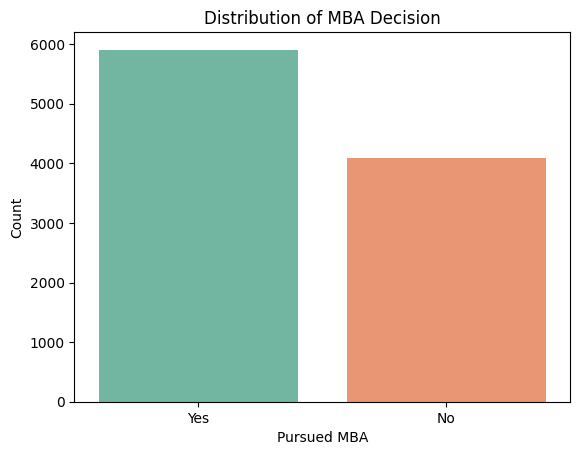

In [11]:
## Check whether the dataset target (Decided to Pursue MBA) is imbalanced
sns.countplot(data=df, x='Decided to Pursue MBA?', hue='Decided to Pursue MBA?', palette='Set2')
plt.title('Distribution of MBA Decision')
plt.xlabel('Pursued MBA')
plt.ylabel('Count')
plt.show()

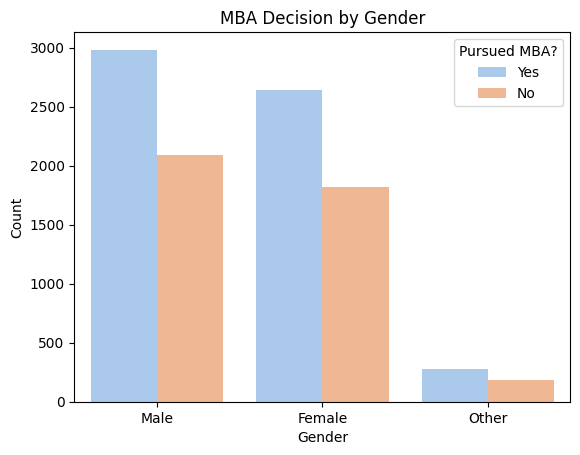

In [12]:
## Explore gender disparity in relation to MBA decision
sns.countplot(data=df, x='Gender', hue='Decided to Pursue MBA?',palette='pastel')
plt.title('MBA Decision by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Pursued MBA?')
plt.show()

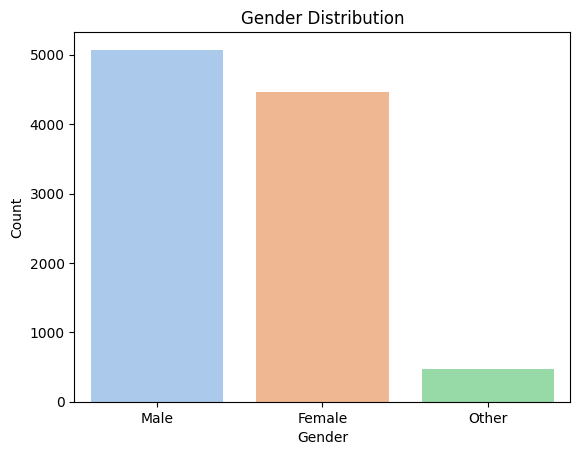

In [13]:
## Visualize the distribution of Gender
sns.countplot(data=df, x='Gender', hue='Gender', palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

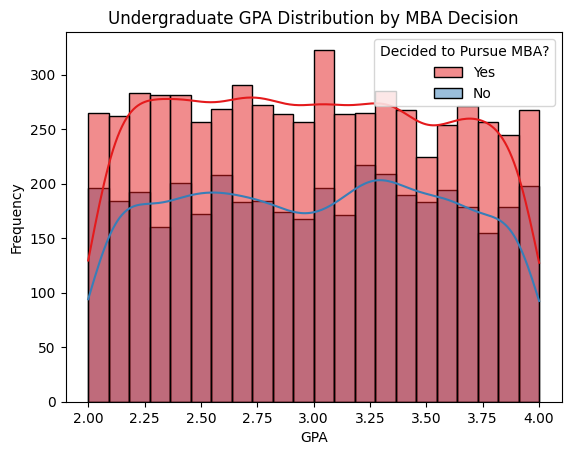

In [28]:
## Understand GPA trends between groups.
sns.histplot(data=df, x='Undergraduate GPA', hue='Decided to Pursue MBA?', kde=True, palette='Set1')
plt.title('Undergraduate GPA Distribution by MBA Decision')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.show()


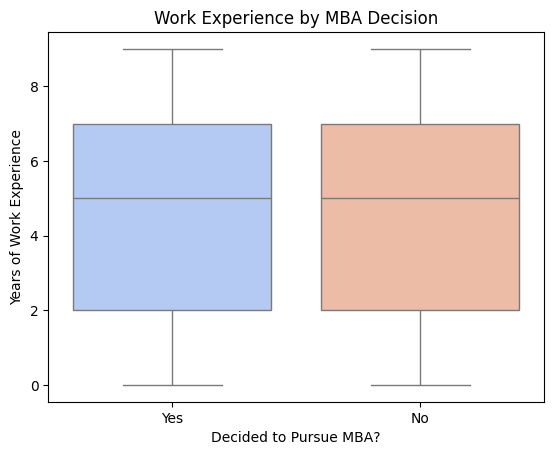

In [30]:
## Work Experience vs. Decision
sns.boxplot(data=df, x='Decided to Pursue MBA?', hue='Decided to Pursue MBA?', y='Years of Work Experience', palette='coolwarm')
plt.title('Work Experience by MBA Decision')
plt.show()


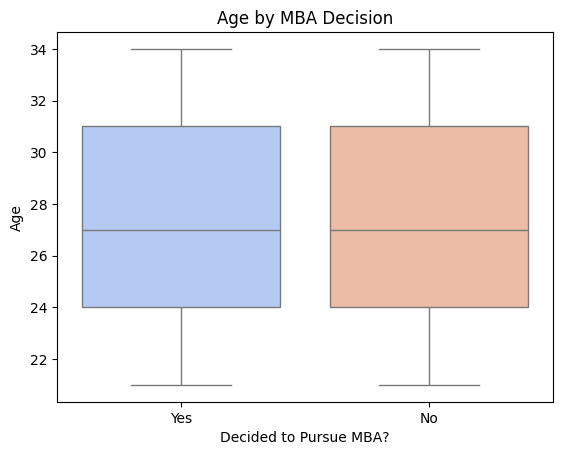

In [32]:
## Age vs. Decision
sns.boxplot(data=df, x='Decided to Pursue MBA?', hue='Decided to Pursue MBA?', y='Age', palette='coolwarm')
plt.title('Age by MBA Decision')
plt.show()

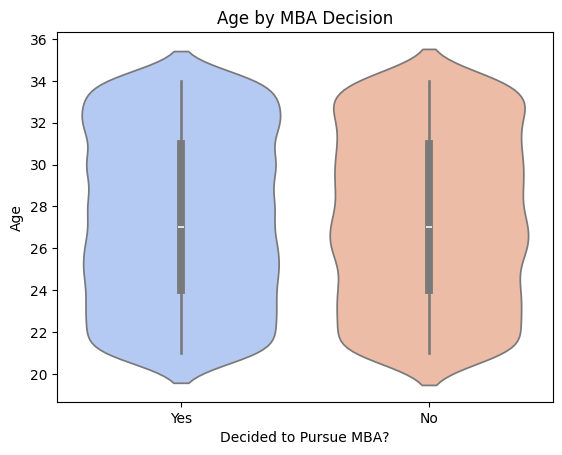

In [34]:
## Age vs. Decision
sns.violinplot(data=df, x='Decided to Pursue MBA?',hue='Decided to Pursue MBA?', y='Age', palette='coolwarm')
plt.title('Age by MBA Decision')
plt.show()

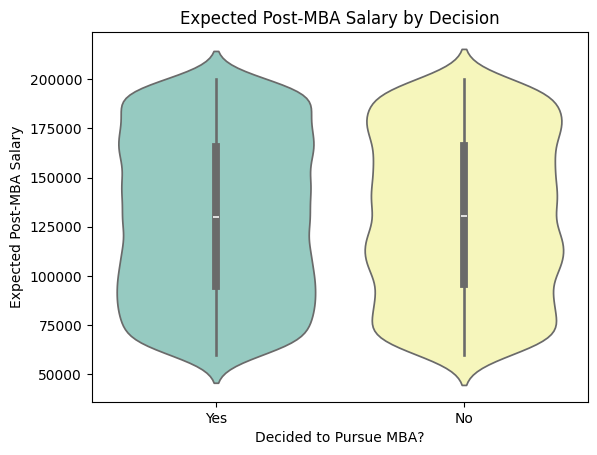

In [36]:
## Post-MBA Salary Expectation vs. Decision
sns.violinplot(data=df, x='Decided to Pursue MBA?', hue='Decided to Pursue MBA?', y='Expected Post-MBA Salary', palette='Set3')
plt.title('Expected Post-MBA Salary by Decision')
plt.show()


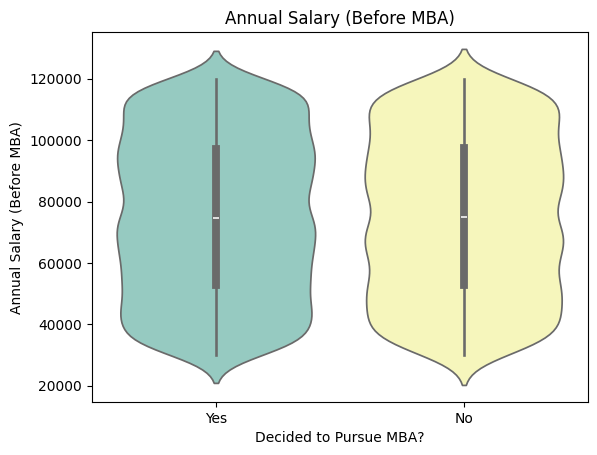

In [38]:
## Annual Salary (Before MBA) vs. Decision
sns.violinplot(data=df, x='Decided to Pursue MBA?', hue='Decided to Pursue MBA?', y='Annual Salary (Before MBA)', palette='Set3')
plt.title('Annual Salary (Before MBA)')
plt.show()

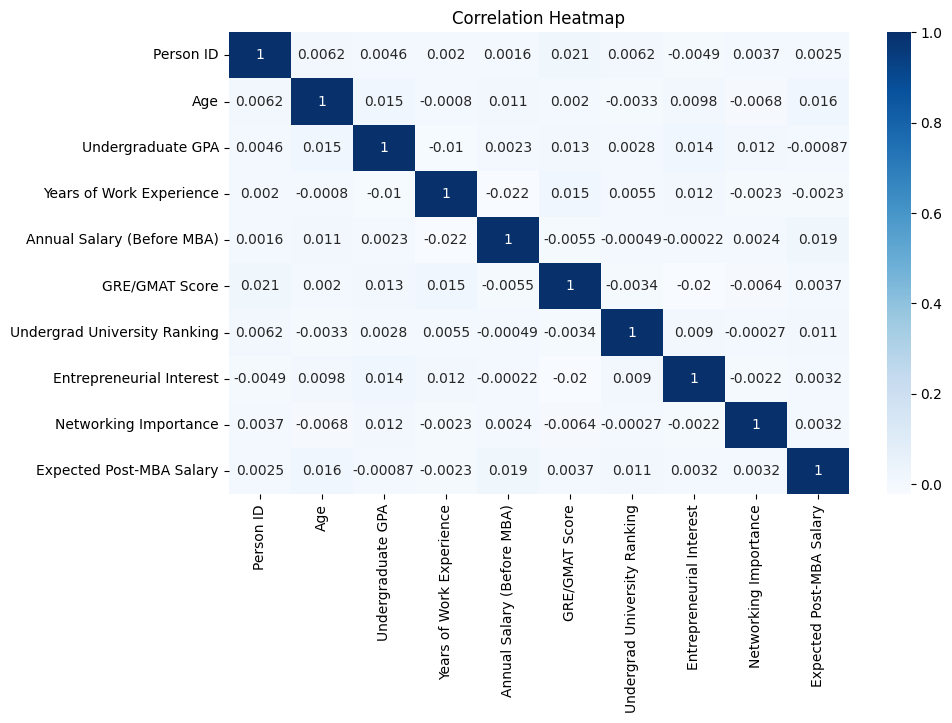

In [39]:
##  Correlation Heatmap (for numeric features)
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot =True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

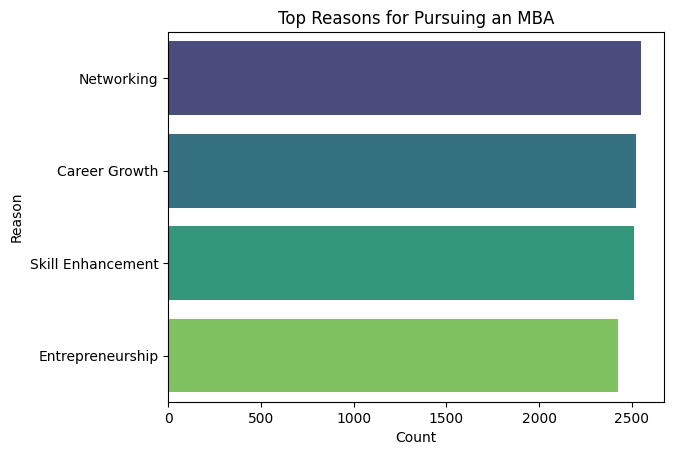

In [41]:
## Top Reasons for Pursuing an MBA
top_reasons = df['Reason for MBA'].value_counts().head(20)
sns.barplot(x=top_reasons.values, hue=top_reasons.index, y=top_reasons.index, palette='viridis')
plt.title('Top Reasons for Pursuing an MBA')
plt.xlabel('Count')
plt.ylabel('Reason')
plt.show()


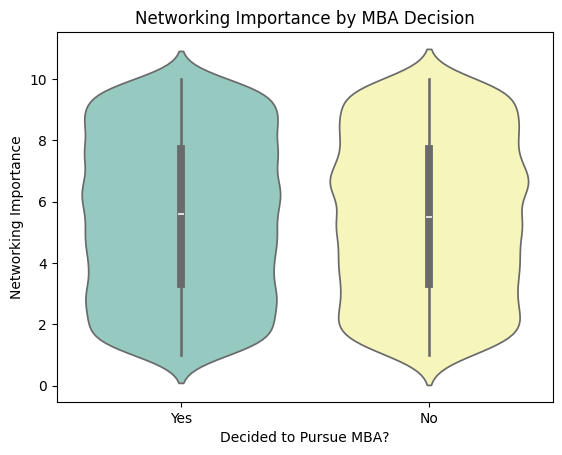

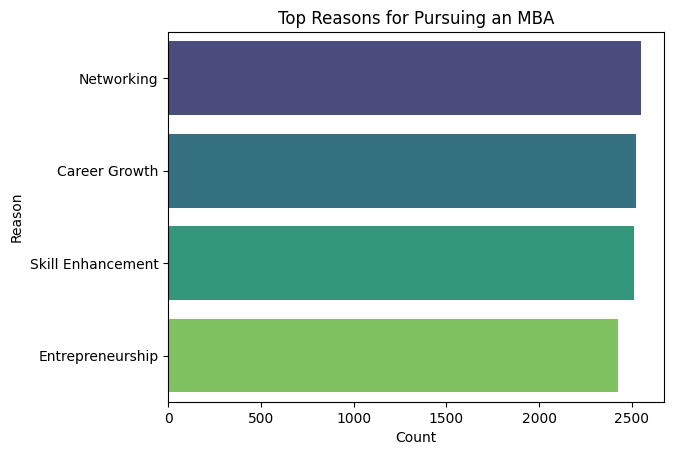

In [43]:
## Networking Importance vs. Decision
sns.violinplot(data=df, x='Decided to Pursue MBA?', hue='Decided to Pursue MBA?', y='Networking Importance', palette='Set3')
plt.title('Networking Importance by MBA Decision')
plt.show()


## Top Reasons for Pursuing an MBA
top_reasons = df['Reason for MBA'].value_counts().head(20)
sns.barplot(x=top_reasons.values, hue=top_reasons.index, y=top_reasons.index, palette='viridis')
plt.title('Top Reasons for Pursuing an MBA')
plt.xlabel('Count')
plt.ylabel('Reason')
plt.show()

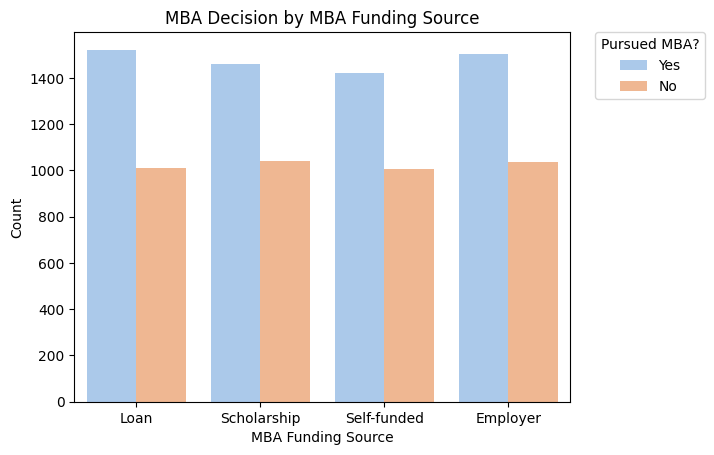

In [44]:
## MBA Funding Source vs MBA decision
sns.countplot(data=df, x='MBA Funding Source', hue='Decided to Pursue MBA?',palette='pastel')
plt.title('MBA Decision by MBA Funding Source')
plt.xlabel('MBA Funding Source')
plt.ylabel('Count')
plt.legend(title='Pursued MBA?', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

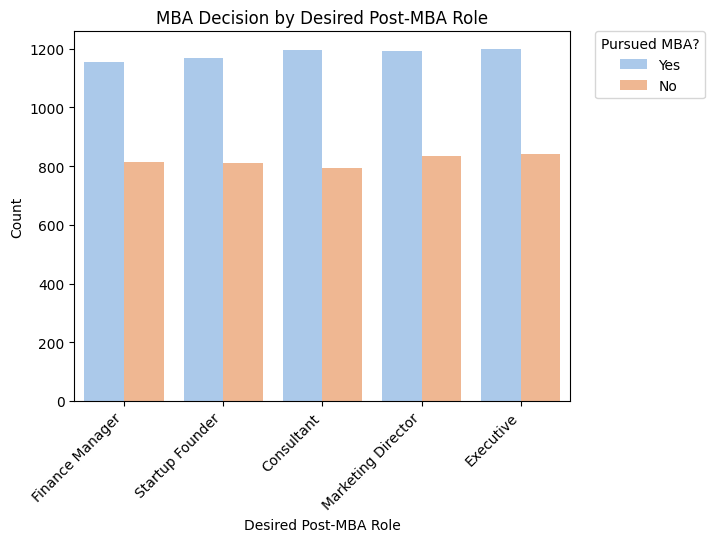

In [45]:
## Desired Post-MBA Role vs MBA decision
sns.countplot(data=df, x='Desired Post-MBA Role', hue='Decided to Pursue MBA?',palette='pastel')
plt.title('MBA Decision by Desired Post-MBA Role')
plt.xlabel('Desired Post-MBA Role')
plt.ylabel('Count')

## Rotate the a-axis labels
plt.xticks(rotation=45, ha='right')
plt.legend(title='Pursued MBA?', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

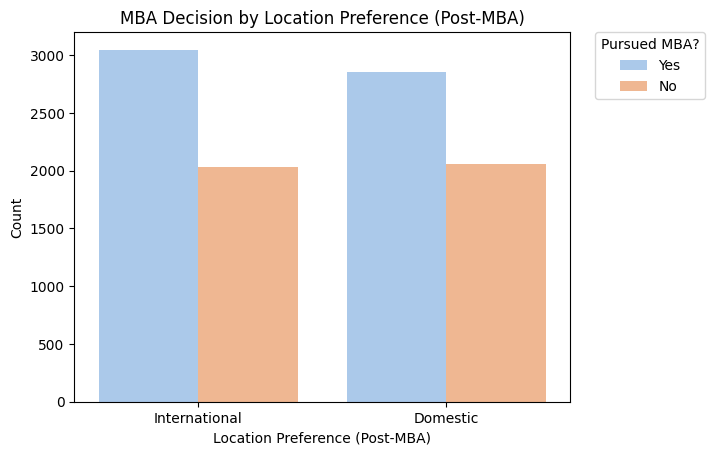

In [46]:
## Location Preference (Post-MBA) vs MBA decision
sns.countplot(data=df, x='Location Preference (Post-MBA)', hue='Decided to Pursue MBA?',palette='pastel')
plt.title('MBA Decision by Location Preference (Post-MBA)')
plt.xlabel('Location Preference (Post-MBA)')
plt.ylabel('Count')
plt.legend(title='Pursued MBA?', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

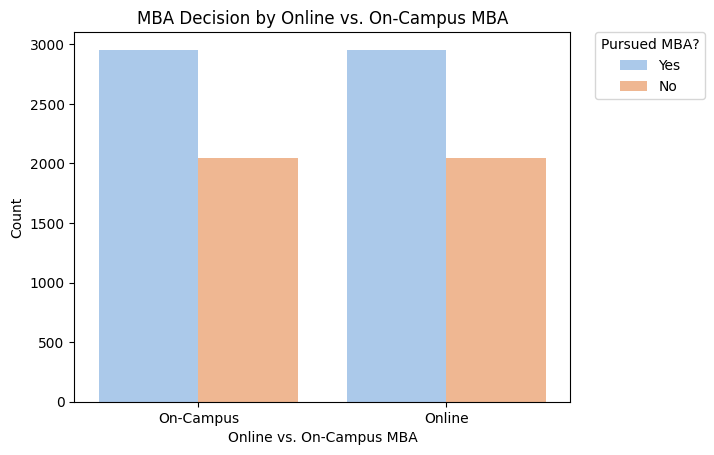

In [47]:
## Online vs. On-Campus MBA vs MBA decision
sns.countplot(data=df, x='Online vs. On-Campus MBA', hue='Decided to Pursue MBA?',palette='pastel')
plt.title('MBA Decision by Online vs. On-Campus MBA')
plt.xlabel('Online vs. On-Campus MBA')
plt.ylabel('Count')
plt.legend(title='Pursued MBA?', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

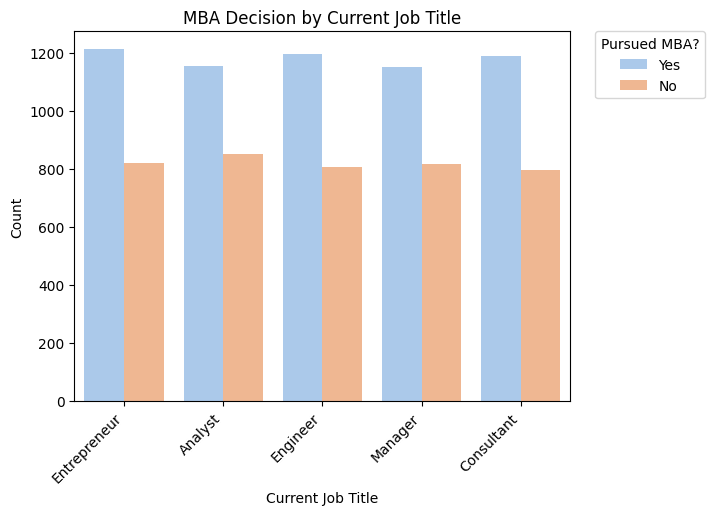

In [48]:
## Current Job Title vs MBA decision
sns.countplot(data=df, x='Current Job Title', hue='Decided to Pursue MBA?',palette='pastel')
plt.title('MBA Decision by Current Job Title')
plt.xlabel('Current Job Title')
plt.ylabel('Count')

## Rotate the a-axis labels
plt.xticks(rotation=45, ha='right')
plt.legend(title='Pursued MBA?', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

### Findings
#### 1. Data Distribution of the target in the Dataset
##### - The number of those who decided to pursue an MBA in this dataset is slightly higher than the number of those who decided not to.
##### - Roughly close to 6000 persons decided to pursue and MBA
##### - And around 4000 persons decided not to pursue and MBA

#### 2. Gender Distribution
##### - Three genders have been represented in the dataset (Male, Female and Others)
##### - Male gender is the highest with around 5000 persons. Around 3000 out of the 5000 pursued an MBA and around 2000 did not
##### - Female gender comes in second with around 4500 persons. Around 2500 (of the 4500) pursued an MBA
##### - Others comes in last with around 500 persons. Around 250 persons pursued an MBA

#### 3. GPA Distribution
##### - GPA value does not really have a singificant effect on whether one will pursue an MBA or not in this dataset
##### - The GPA distribution of those who decided to pursue an MBA and those who did not is normally distributed.

#### 4. Post-MBA Salary Expectation in regard to MBA Decision
##### - It is observed that slightly more persons expecting a salary of between 160,000 - 180,000 decided to pursue an MBA than those who did not pursue and MBA in the same salary expectation bracket
##### - It is observed that slightly more persons expecting a salary of between 80,000 and 125,000 decided not to pursue an MBA than those who decided to pursue an MBA in the same salary expectation bracket

### Data Preparation And Encoding
##### For this step we are going to: 
##### - Encode categorical variables
##### - Handle any imbalances if necessary
##### - Normalize/scale features
##### - Split into training and test sets



In [15]:
## Make a copy of the data
df_Model = df.copy()

## Convert Target to binary
df_Model['Decided to Pursue MBA?'] = df_Model['Decided to Pursue MBA?'].map({'Yes':1,'No':0})

## Drop Non informative column
df_Model = df_Model.drop('Person ID', axis=1)

In [16]:
## Identify the categorical columns
categorical_cols = df_Model.select_dtypes(include='object').columns
print(categorical_cols)

Index(['Gender', 'Undergraduate Major', 'Current Job Title',
       'Has Management Experience', 'MBA Funding Source',
       'Desired Post-MBA Role', 'Location Preference (Post-MBA)',
       'Reason for MBA', 'Online vs. On-Campus MBA'],
      dtype='object')


In [17]:
## Encode Categorical Columns
df_Model = pd.get_dummies(df_Model, columns=categorical_cols,drop_first=True)

In [18]:
## Separate the features from the target
x = df_Model.drop('Decided to Pursue MBA?', axis=1)
y = df_Model['Decided to Pursue MBA?']

print(x.columns)

Index(['Age', 'Undergraduate GPA', 'Years of Work Experience',
       'Annual Salary (Before MBA)', 'GRE/GMAT Score',
       'Undergrad University Ranking', 'Entrepreneurial Interest',
       'Networking Importance', 'Expected Post-MBA Salary', 'Gender_Male',
       'Gender_Other', 'Undergraduate Major_Business',
       'Undergraduate Major_Economics', 'Undergraduate Major_Engineering',
       'Undergraduate Major_Science', 'Current Job Title_Consultant',
       'Current Job Title_Engineer', 'Current Job Title_Entrepreneur',
       'Current Job Title_Manager', 'Has Management Experience_Yes',
       'MBA Funding Source_Loan', 'MBA Funding Source_Scholarship',
       'MBA Funding Source_Self-funded', 'Desired Post-MBA Role_Executive',
       'Desired Post-MBA Role_Finance Manager',
       'Desired Post-MBA Role_Marketing Director',
       'Desired Post-MBA Role_Startup Founder',
       'Location Preference (Post-MBA)_International',
       'Reason for MBA_Entrepreneurship', 'Reason for 

In [19]:
## Spliting into training and testing and Feature scalling - Normalize numeric features
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42, stratify=y)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
## Apply the SMOTE Technique to balance the data 
## From the Target Distribution Graph the number of persons who pursed and MBA was slightly higher than those who did not)
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4"  # actual number of physical CPU cores
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Check new class distribution
from collections import Counter
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_resampled))

Before SMOTE: Counter({1: 4726, 0: 3274})
After SMOTE: Counter({0: 4726, 1: 4726})


### Model Building
##### In these step we are going to use different classification methods to build models to evaluate and predict the data

##### We are going to use the following models:
##### 1. Logistic Regression
##### 2. Random Forest
##### 3. XG-Boost

#### Logistic Regression

In [30]:
## Model Building
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Create and Train the model
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train_resampled,y_train_resampled)

# Predict on the test set
y_pred = logreg.predict(X_test_scaled)

Confusion Matrix:
[[386 433]
 [568 613]]
Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.47      0.44       819
           1       0.59      0.52      0.55      1181

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.49      2000
weighted avg       0.51      0.50      0.50      2000



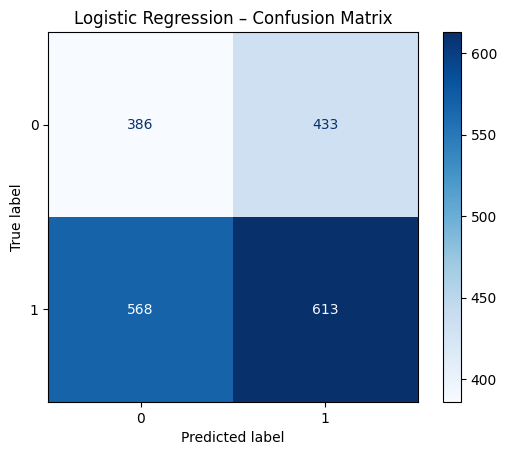

In [31]:
## Evaluate The model
# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title('Logistic Regression – Confusion Matrix')
plt.show()


#### Random Forest

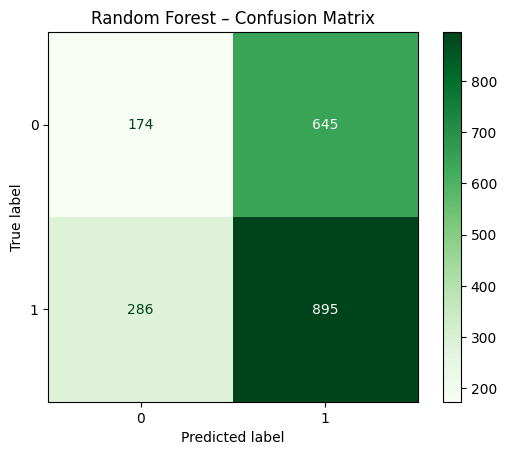

In [32]:
## Random Forest Model

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize Random Forest with class_weight to handle any subtle imbalance
rf = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=100)

# Train on the resampled (balanced) training data
rf.fit(X_train_resampled, y_train_resampled)

# Predict on the original (unseen) test set
y_pred_rf = rf.predict(X_test_scaled)


from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, cmap='Greens')
plt.title("Random Forest – Confusion Matrix")
plt.show()


#### XG-Boost 

Confusion Matrix (XGBoost):
[[271 548]
 [384 797]]
Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.41      0.33      0.37       819
           1       0.59      0.67      0.63      1181

    accuracy                           0.53      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.52      0.53      0.52      2000



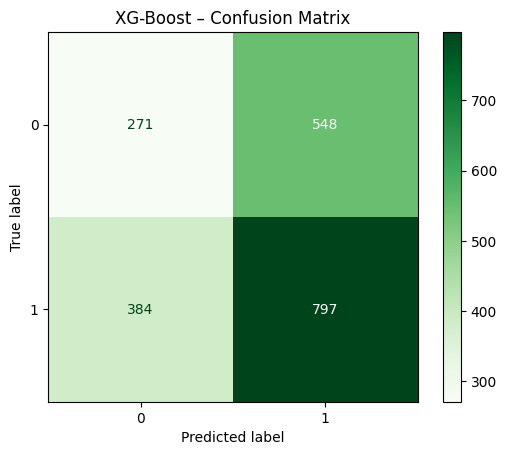

In [34]:
## XG-Boost Model
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the model
xgb = XGBClassifier(eval_metric='logloss', random_state=42)

# Train using the resampled, scaled training set
xgb.fit(X_train_resampled, y_train_resampled)

# Predict on the untouched test set
y_pred_xgb = xgb.predict(X_test_scaled)


# Confusion matrix
print("Confusion Matrix (XGBoost):")
print(confusion_matrix(y_test, y_pred_xgb))

# Classification report
print("Classification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb))

# Visual Display of the Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb, cmap='Greens')
plt.title("XG-Boost – Confusion Matrix")
plt.show()

### Summary Report
#### 1. Logistic Regression
##### From the confusion matrix we have: 
    ##### -386: Correctly predicted NO (True Negatives)
    ##### -433: Incorrectly predicted YES when it was NO (False Positives)
    ##### -568: Incorrectly predicted NO when it was YES (False Negatives)
    ##### -613: Correctly predicted YES (True Positives)

##### From the CLassification Report we can see that:
    ##### -For 0 (NO MBA) Precision = 0.40, Recall = 0.47, F1 score = 0.44 
    ##### -For 1 (YES MBA) Precision = 0.59, Recall = 0.52, F1 score = 0.55
    ##### -Accuracy = 0.50


##### Conclusion
    ##### - A 53% Accuracy is not good the model is almost random guessing
    ##### - A precision score of 40% means that  only 40% of the people it predicted won’t pursue MBA actually won’t.
    ##### - A recall of 47% means the model is only catching 47% of the "NO" cases
    ##### - The model is biased toward predicting "Yes". 




#### 2. Random Forest
##### From the confusion matrix we have: 
    ##### -174 True Negatives (correctly predicted "No MBA")
    ##### -645 False Positives (predicted "Yes MBA" but they actually said No)
    ##### -286 False Negatives (predicted "No MBA" but they actually said Yes)
    ##### -895 True Positives (correctly predicted "Yes MBA")

##### From the CLassification Report we can see that:
    ##### -For 0 (NO MBA) Precision = 0.38, Recall = 0.21, F1 score = 0.27 
    ##### -For 1 (YES MBA) Precision = 0.58, Recall = 0.76, F1 score = 0.66
    ##### -Accuracy = 0.53

##### Conclusion
    ##### -The model leans heavily toward predicting "Yes", even when it's wrong — like the logistic regression did.
    ##### -Class 1 (Yes) has decent performance (Recall: 76%), but
    ##### -Class 0 (No) is getting ignored — with only 21% recall and a poor F1-score of 0.27.

#### 3. XG-Boost
##### From the confusion matrix we have: 
    ##### -271 True Negatives (correctly predicted "No MBA")
    ##### -548 False Positives (predicted "Yes MBA" but they actually said No)
    ##### -384 False Negatives (predicted "No MBA" but they actually said Yes)
    ##### -797 True Positives (correctly predicted "Yes MBA")

##### From the CLassification Report we can see that:
    ##### -For 0 (NO MBA) Precision = 0.41, Recall = 0.33, F1 score = 0.37 
    ##### -For 1 (YES MBA) Precision = 0.59, Recall = 0.67, F1 score = 0.63
    ##### -Accuracy = 0.53

##### Conclusion
    ##### -Slight improvement in performance over Random Forest for class 1 (Yes MBA), but:
    ##### -Still struggles on class 0 (No MBA) — recall only 33%
    ##### -Accuracy at 53% → Better than random, but not strong yet
    
#### Final Conclusion
##### -All models (LogReg, RF, XGBoost) perform better on "Yes MBA" than "No MBA"
##### -This is likely data-driven, not model-driven → “Yes” is easier to detect because the reasons are clearer in the data.